In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

%matplotlib inline

In [92]:
Toyota=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')

In [93]:
Toyota.shape

(1436, 38)

In [94]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [95]:
Toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [96]:
#("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

In [97]:
Toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [105]:
df=Toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]].copy()

In [106]:
#Price  -- Offer Price in EUROs	

#Age_08_04 -- Age in months as in August 2004	

#KM -- Accumulated Kilometers on odometer

#HP -- Horse Power

#cc -- Cylinder Volume in cubic centimeters

#Doors -- Number of doors

#Gears -- Number of gear 

#Quarterly_Tax -- Quarterly road tax in EUROs

#Weight -- Weight in Kilograms

In [107]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [108]:
df.shape

(1436, 9)

In [109]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [110]:
df=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [111]:
df.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [48]:
df.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

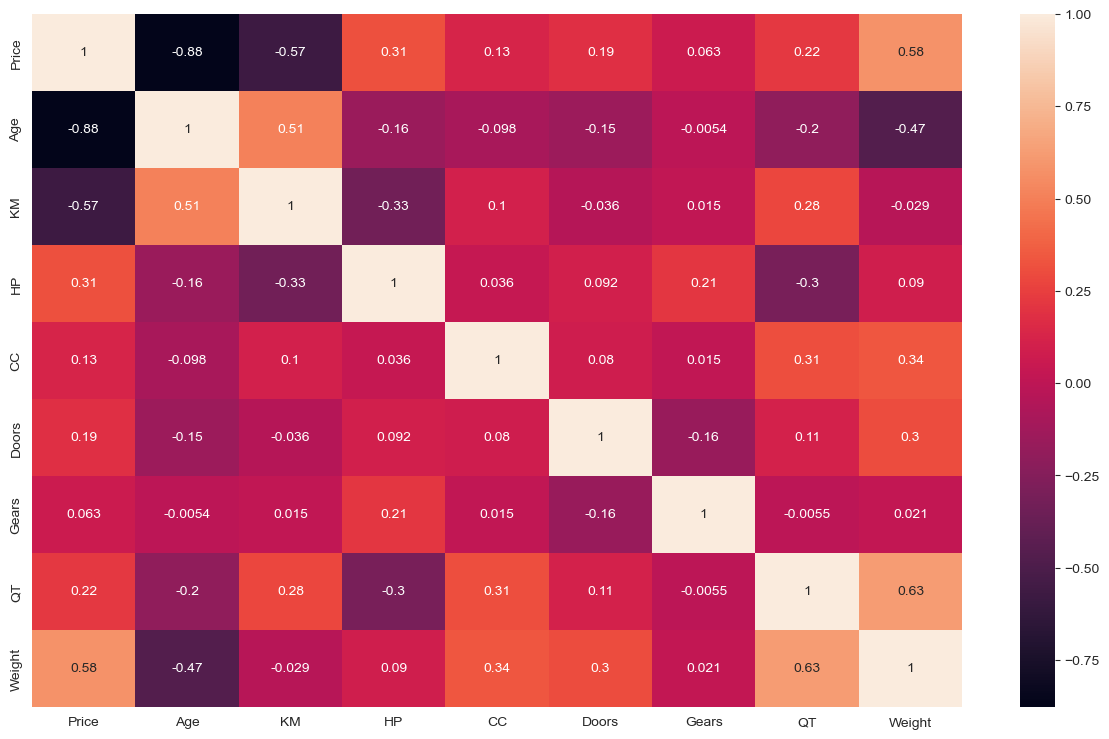

In [49]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

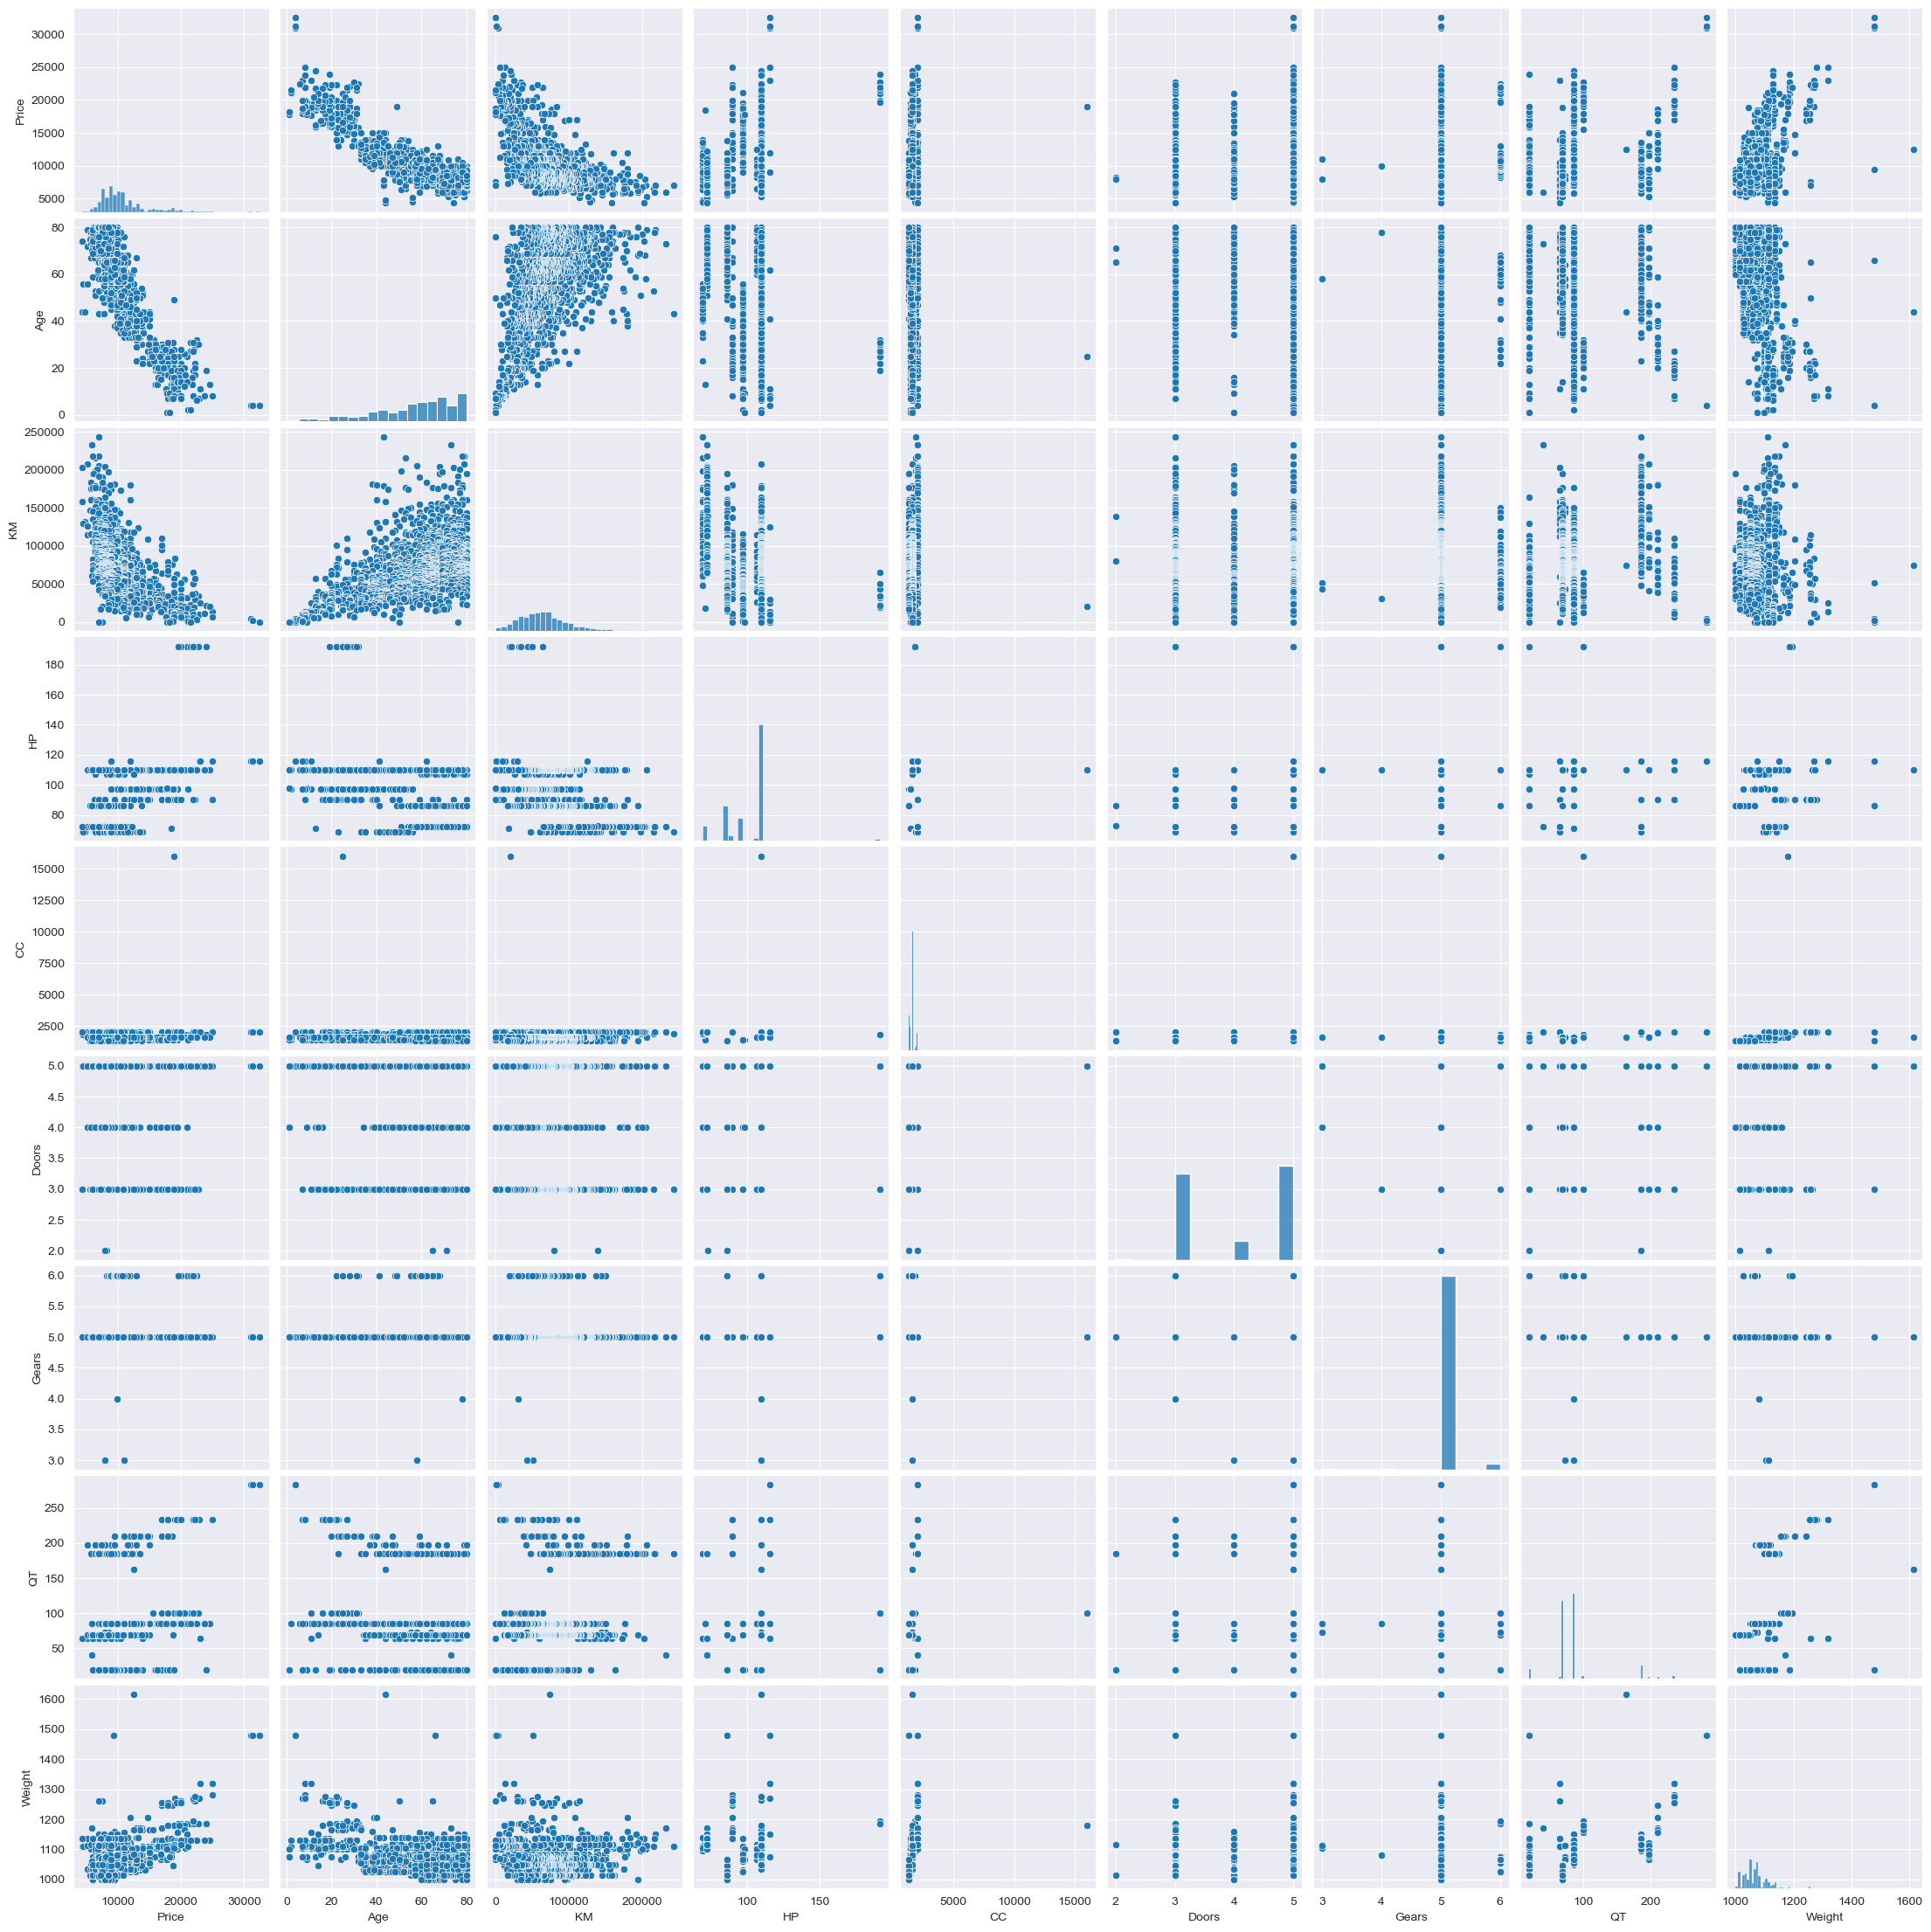

In [50]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [52]:
df.head(4)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165


# Building The Model

In [21]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:50:16   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model.rsquared

0.8637627463428192

In [24]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

In [25]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [26]:
model.predict()

array([16812.58050518, 16272.3551858 , 16800.73245986, ...,
        8454.29800681,  8578.03812147, 10402.43833284])

In [27]:
df.shape

(1436, 9)

# VIF Calculation

In [31]:
#1. Collinearity problem check by Calculating Vif
rsq_Age = smf.ols("Age~KM+HP+CC+Doors+Gears+QT+Weight",data=df).fit().rsquared  
vif_Age = 1/(1-rsq_Age)
rsq_Km = smf.ols("KM~Age+HP+CC+Doors+Gears+QT+Weight",data=df).fit().rsquared  
vif_Km = 1/(1-rsq_Km) 
rsq_Hp = smf.ols("HP~Age+KM+CC+Doors+Gears+QT+Weight",data=df).fit().rsquared  
vif_Hp = 1/(1-rsq_Hp) 
rsq_Cc = smf.ols("CC~Age+KM+HP+Doors+Gears+QT+Weight",data=df).fit().rsquared  
vif_Cc = 1/(1-rsq_Cc)
rsq_Doors = smf.ols("Doors~Age+KM+HP+CC+Gears+QT+Weight",data=df).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 
rsq_Gears = smf.ols("Gears~Age+KM+HP+CC+Doors+QT+Weight",data=df).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 
rsq_Qt = smf.ols("QT~Age+KM+HP+CC+Doors+Gears+Weight",data=df).fit().rsquared  
vif_Qt = 1/(1-rsq_Qt)
rsq_weight = smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+QT",data=df).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 


# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_Age,vif_Km,vif_Hp,vif_Cc,vif_Doors,vif_Gears,vif_Qt,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


In [32]:
#This conclude that all columns are independent of each other

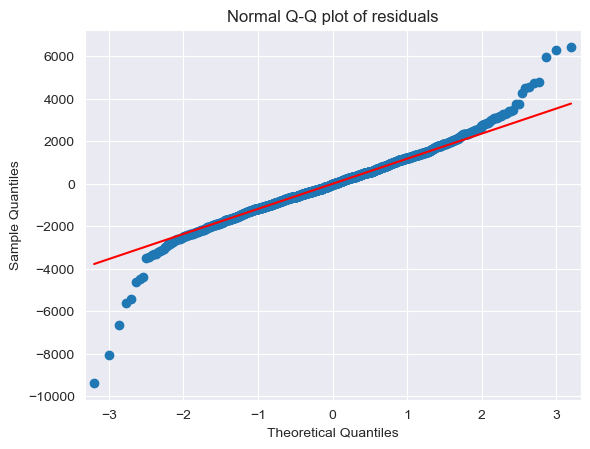

In [56]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot for Homoscedasticity

In [57]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

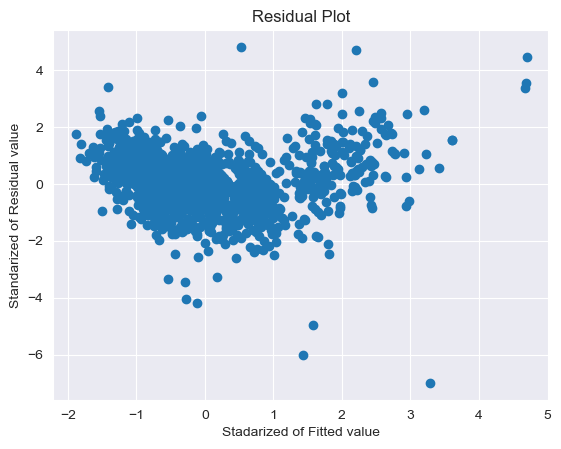

In [58]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel("Stadarized of Fitted value")
plt.ylabel("Standarized of Residual value")
plt.show()

# Detecting Outliers 

#  Cooks Distance

In [59]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [60]:
df.shape

(1436, 9)

In [61]:
K=8
N=1436
leverage_cutoff=3*(K+1)/N
leverage_cutoff

0.018802228412256268

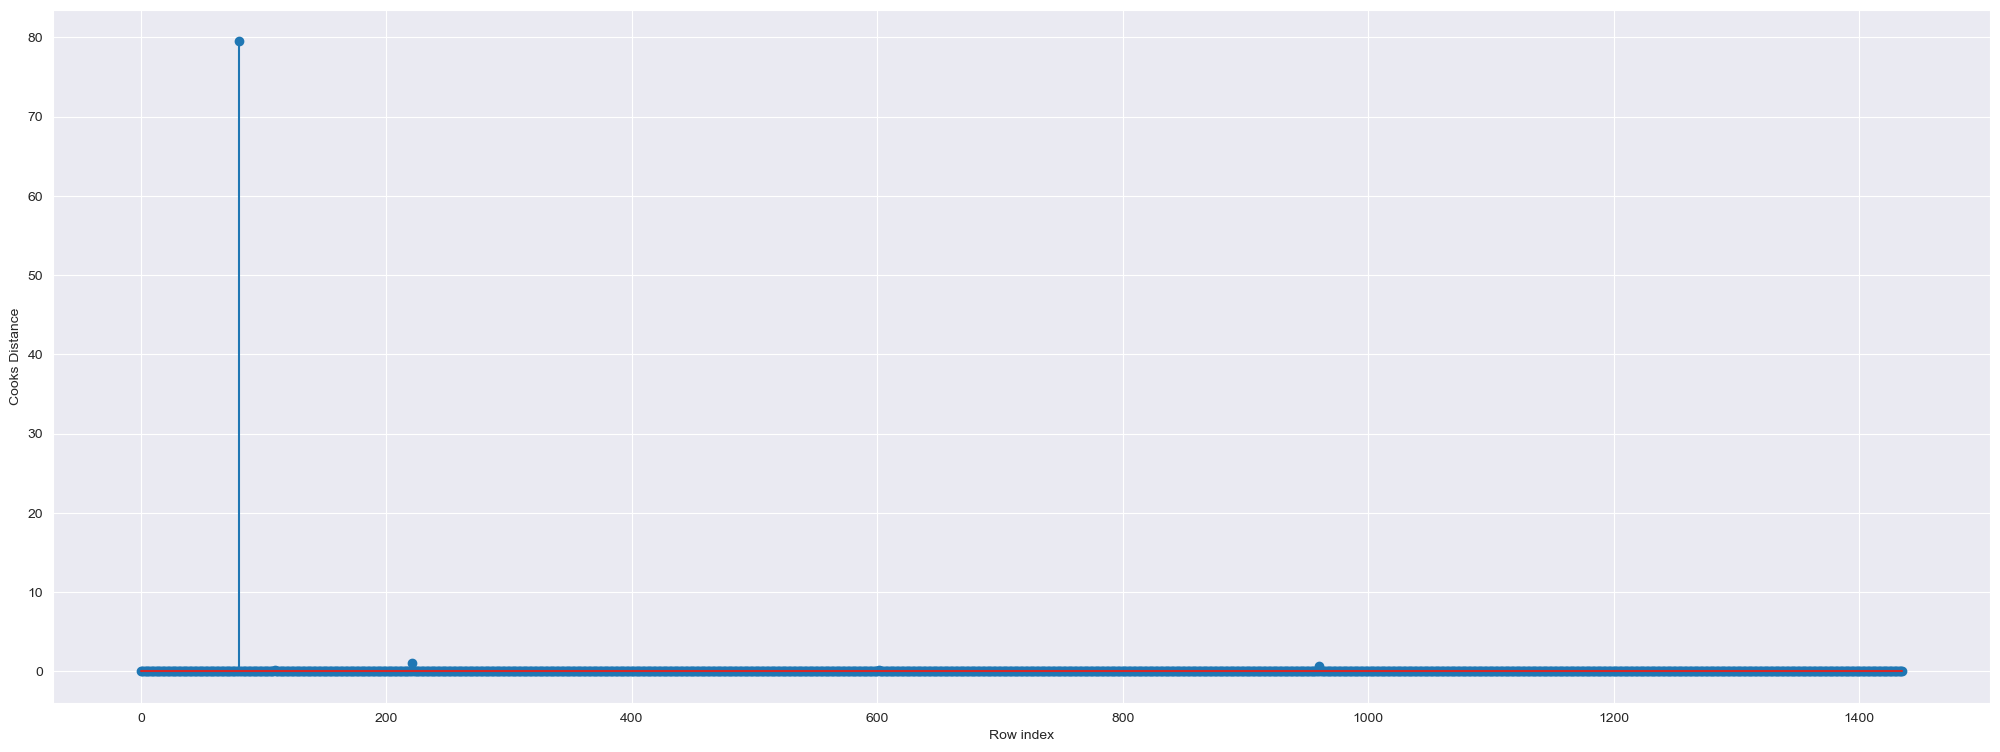

In [63]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(25, 9))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
(np.argmax(c),np.max(c))

(80, 79.52010624146067)

In [65]:
np.where(c>0.018)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

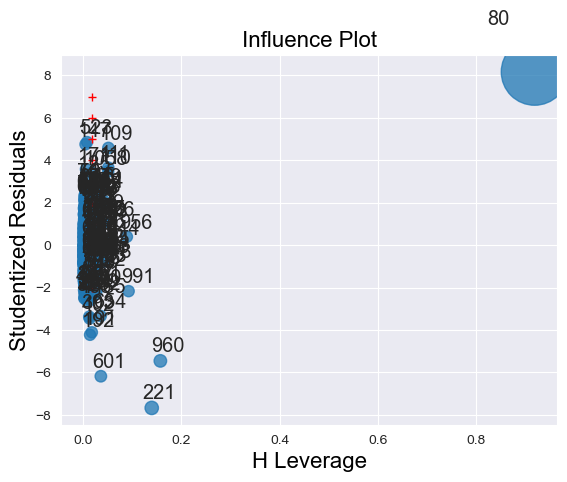

In [71]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

# Improving Model

In [80]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df_toyota=df.drop(df.index[[  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058]],axis=0).reset_index()

In [85]:
df_toyota.shape

(1419, 10)

In [86]:
df_toyota.columns

Index(['index', 'Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT',
       'Weight'],
      dtype='object')

In [87]:
#Drop the original index
df_toyota=df_toyota.drop(['index'],axis=1)

In [88]:
df_toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1414,7500,69,20544,86,1300,3,5,69,1025
1415,10845,72,19000,86,1300,3,5,69,1015
1416,8500,71,17016,86,1300,3,5,69,1015
1417,7250,70,16916,86,1300,3,5,69,1015


# Final Model Building

In [89]:
final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df_toyota).fit()

In [90]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:20:48   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
Age         -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM            -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP            28.9815      2.768     10.472      0.000      23.552      34.410
CC            -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors       -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears        308.8824    180.506      1.711      0.087     -45.206     662.971
QT             2.1111      1.358      1.555      0.120      -0.553       4.775
Weight        31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""